# Chapter 4 - Understanding Quantum Computation Basics
This Jupyter notebook has been updated to work with Python 3.12 and the following Qiskit versions:
* Qiskit v1.3, Qiskit runtime version: 0.34
* Qiskit v 2.0, Qiskit runtime version: 0.37
|||
|-|-|
|**Author:** |Robert Loredo|
|**Reviewer:** |Alain Chancé|
|**Date:** |April 12, 2025|
|**Version:** |**1.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Robert Loredo, Learn Quantum Computing with Python and IBM Quantum: Write your own practical quantum programs with Python, Second Edition, Packt, Feb 25, 2025](https://www.packtpub.com/en-us/product/learn-quantum-computing-with-python-and-ibm-quantum-9781803240923)
[Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/Chapter 4 - Understanding Quantum Computation Basics-Final.ipynb](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/Chapter%204%20-%20Understanding%20Quantum%20Computation%20Basics-Final.ipynb)
[Packt's code repository for the book](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition)
[LICENSE](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/LICENSE)
<br/>

In [1]:
# Load helper file
%run helper_file_1.0.ipynb

Token read from file:  Token.txt
Qiskit version: 2.0.0
Qiskit runtime version: 0.37.0
/home/alain/miniconda3/bin/python
Python 3.12.9


In [2]:
backends = service.backends()
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


# Chapter 4 - 

In [3]:
!pip install qiskit-aer

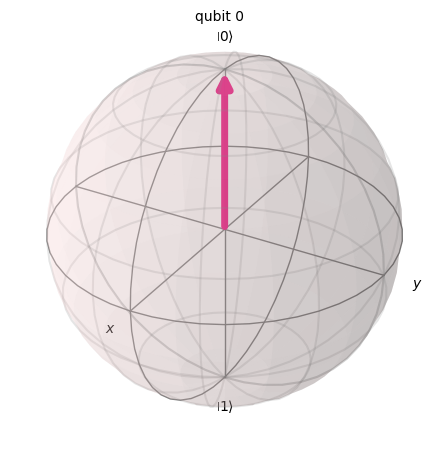

In [4]:
# Modified by Alain Chancé
#from qiskit import BasicAer
#backend = BasicAer.get_backend('statevector_simulator')
import qiskit_aer
from qiskit_aer import AerSimulator
backend = AerSimulator(method='statevector')

qc = QuantumCircuit(1,1)

#transpiledQC, result, stateVectorResult = run_sv_circuit(qc, backend)
#transpiledQC, result, stateVectorResult = run_sv_circuit(qc)

# Modified by Alain Chancé
#transpiledQC, result, stateVectorResult = run_simulated_circuit(qc, backend, None)
transpiledQC, result, stateVectorResult = run_simulated_circuit(qc, backend)

#print(stateVectorResult.result().data_bin.meas.get_counts())

#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)


Figure 4.3: Two basis states of a qubit on a Bloch sphere

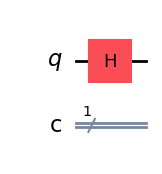

In [5]:
#Place the qubit in a superposition state by adding a Hadamard (H)gate
qc.h(0)
#Draw the circuit
# Modified by Alain Chancé
#qc.draw()
qc.draw(output='mpl')

Figure 4.4: Circuit with a Hadamard (H) gate added to a qubit

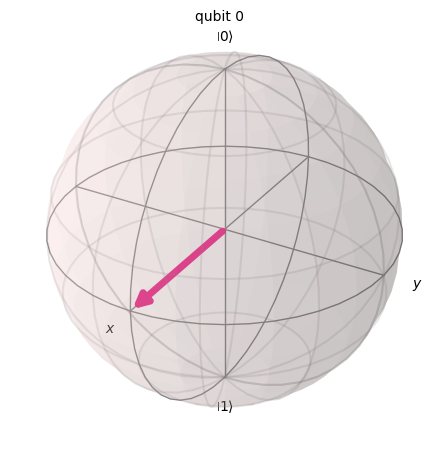

In [6]:
# transpile and run the quantum circuit 
# Modified by Alain Chancé
#transpiledQC, result, stateVectorResult = run_sv_circuit(qc, backend)
stateVectorResult = run_sv_circuit(qc)

#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)

Figure 4.5: Superposition of a qubit after 90° rotation of the basis state

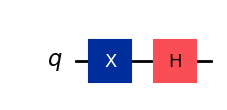

In [7]:
#Reset the circuit
qc = QuantumCircuit(1)
#Rotate the qubit from 0 to 1 using the X (NOT) gate
qc.x(0)
#Add a Hadamard gate
qc.h(0)
#Draw the circuit
# Modified by Alain Chancé
#qc.draw()
qc.draw(output='mpl')

Figure 4.6: Applying an H gate superposition to the base state $|1\rangle$

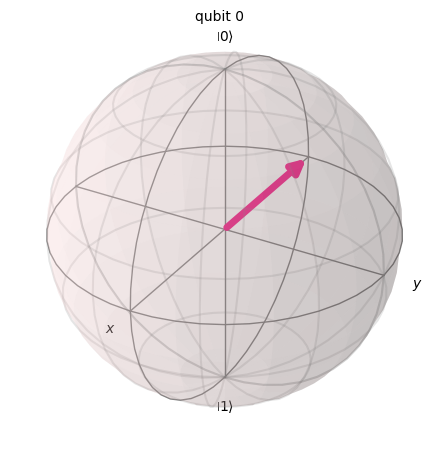

In [8]:
# transpile and run the quantum circuit 
# Modified by Alain Chancé
#transpiledQC, result, stateVectorResult = run_sv_circuit(qc, backend)
stateVectorResult = run_sv_circuit(qc)

#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)

Figure 4.7: Superposition of a qubit after 90° rotation around the X and Z axes from the $|1\rangle$ state

In [9]:
#Recreate the circuit
qc = QuantumCircuit(1,1)
#Add a Hadamard gate
qc.h(0)

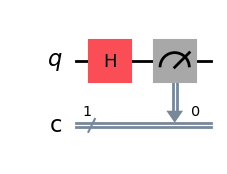

In [10]:
#Create a measurement circuit with 1 qubit and 1 bit
measurement_circuit = QuantumCircuit(1,1)
#Measure function used to map the qubit and bit by their index value on the circuit, respectively
measurement_circuit.measure(0,0)
#Concatenate the circuits together
full_circuit = qc.compose(measurement_circuit)
#Draw the full circuit
# Modified by Alain Chancé
#full_circuit.draw()
full_circuit.draw(output='mpl')

Figure 4.8: Full circuit with rotation and measurement from qubit (q) to classic bit (c)

In [11]:
# Run the quantum circuit 
# Modified by Alain Chancé
#transpiledQC, result = run_qasm_circuit(full_circuit, None, None)
result = run_qasm_simulator(full_circuit)

counts = result.get_counts(full_circuit)
print(counts)

{'1': 511, '0': 513}


## Understanding Entanglement

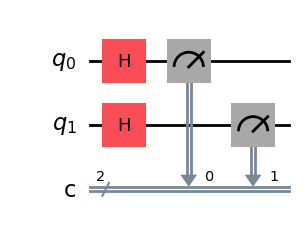

In [12]:
#Create a circuit with 2 qubits and 2 classic bits
qc = QuantumCircuit(2,2)
#Add an H gate to each
qc.h(0)
qc.h(1)
#Measure the qubits to the classical bit
qc.measure([0,1],[0,1])
#Draw the circuit
# Modified by Alain Chancé
#qc.draw()
qc.draw(output='mpl')

Figure 4.11: Two qubits in superposition and measured to their respective classic bits

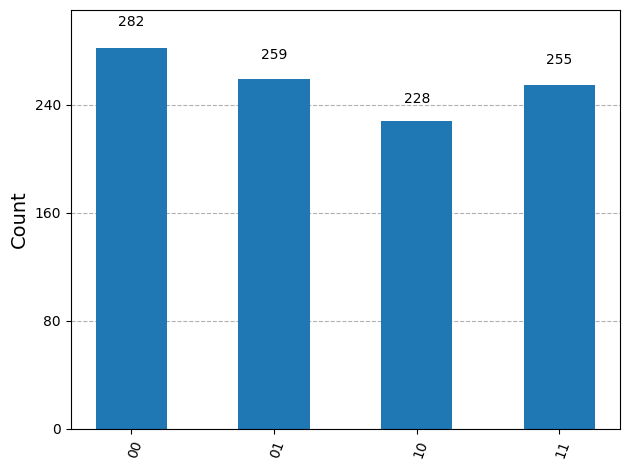

In [13]:
# Run the quantum circuit 
# Modified by Alain Chancé
#transpiledQC, result = run_qasm_circuit(qc, None, None)
result = run_qasm_simulator(qc)

counts = result.get_counts(qc)
plot_histogram(counts)

Figure 4.12: Random results of all combinations from both qubits

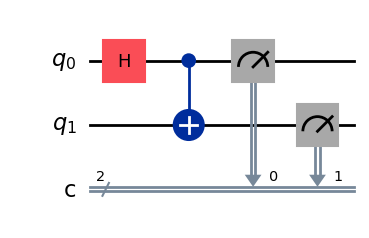

In [14]:
#Create a circuit with 2 qubits and 2 classic bits
qc = QuantumCircuit(2,2)
#Add an H gate to just the first qubit
qc.h(0)
#Add the CNOT gate to entangle the two qubits, where the first qubit is the Control, and the second qubit is the Target. 
qc.cx(0,1)
#Measure the qubits to the classical bit
qc.measure([0,1],[0,1])
#Draw the circuit
# Modified by Alain Chancé
#qc.draw()
qc.draw(output='mpl')

Figure 4.13: Entanglement of two qubits

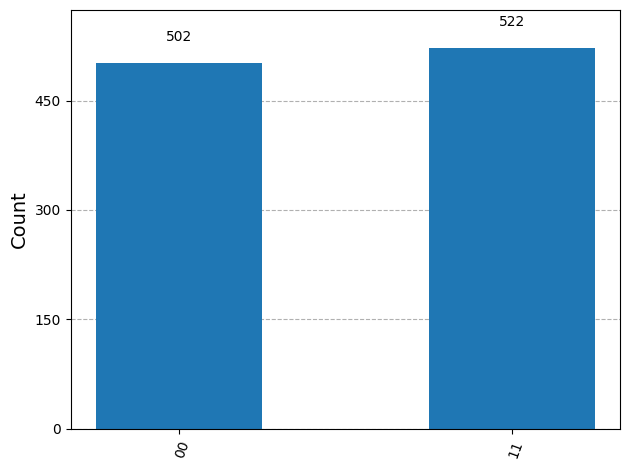

In [15]:
# Run the quantum circuit 
# Modified by Alain Chancé
#transpiledQC, result = run_qasm_circuit(qc, None, None)
result = run_qasm_simulator(qc)

counts = result.get_counts(qc)
plot_histogram(counts)

Figure 4.14: Results of two entangled qubits

# Understanding the Bell State

In [16]:
# State 1: |/+>
state1 = QuantumCircuit(2)
# Initialize input to |0,0>
state1.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

In [17]:
# Prepare the Bell state
state1.h(0)

In [18]:
state1.cx(0,1)

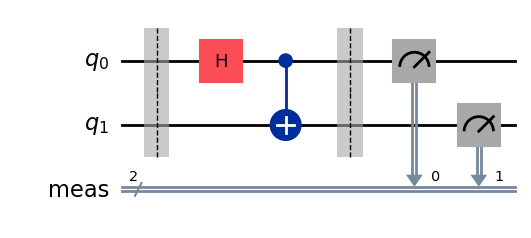

In [19]:
state1.measure_all()
# Modified by Alain Chancé
#state1.draw()
state1.draw(output='mpl')

Figure 4.18: Prepared Bell state, $|\phi_+\rangle = |00\rangle$

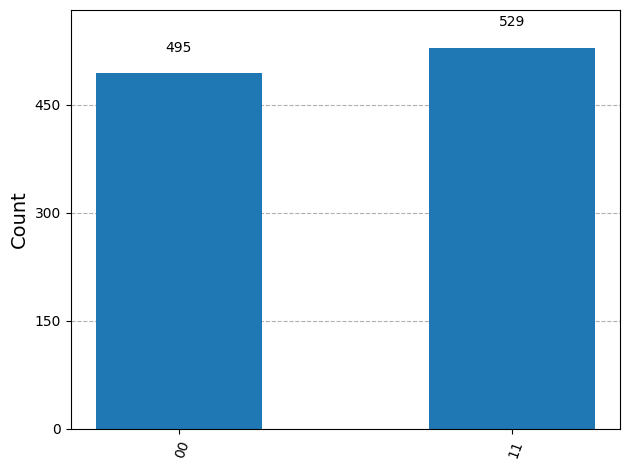

In [20]:
# Execute the Bell state |/+>
# Modified by Alain Chancé
#transpiled_qc, result = execute_circuit(state1, True, None, None, None)
result = execute_circuit(state1, True, None, None, None)

plot_histogram(result.get_counts(state1))

Figure 4.19: Results for the first state, $|\phi_+\rangle = |00\rangle$

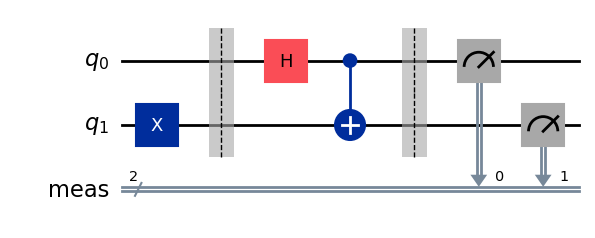

In [21]:
# State 2: |/+>
state2 = QuantumCircuit(2)
# Initialize input state to |1,0>
state2.x(1)
state2.barrier()
# Prepare the Bell state
state2.h(0)
state2.cx(0,1)
state2.measure_all()
# Modified by Alain Chancé
#state2.draw()
state2.draw(output='mpl')

Figure 4.20: Prepared Bell state, $|\psi_+\rangle = |10\rangle$

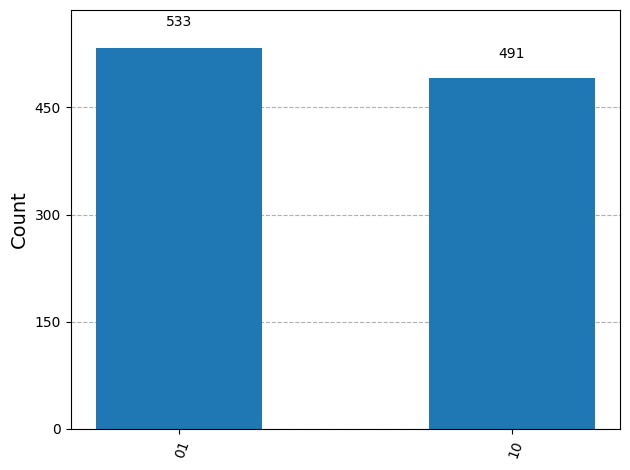

In [22]:
# Execute the Bell state |/+>
# Modified by Alain Chancé
#transpiled_qc, result = execute_circuit(state2, True, None, None, None)
result = execute_circuit(state2, True, None, None, None)

plot_histogram(result.get_counts(state2))

In [23]:
# Commented out by Alain Chancé
#import qiskit.tools.jupyter
#%qiskit_version_table

## Print Qiskit version

In [24]:
import qiskit
print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.0.0


## Print Qiskit runtime version

In [25]:
import qiskit_ibm_runtime
print(f"Qiskit runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit runtime version: 0.37.0


## Show Python version

In [26]:
%%bash
which python
python --version

/home/alain/miniconda3/bin/python
Python 3.12.9
